### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
print(reviews.head())
print(reviews.info())
print(reviews.shape)
print(reviews.dtypes)

   gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  A

In [4]:
# Any missing values?
# Checking missing values
na_value = reviews.isna().any()

# View the result
print(na_value)

gender                    False
age                       False
remuneration (k£)         False
spending_score (1-100)    False
loyalty_points            False
education                 False
language                  False
platform                  False
product                   False
review                    False
summary                   False
dtype: bool


In [5]:
# Explore the data.
print(reviews.describe())

               age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000  


## 2. Drop columns

In [6]:
# Drop unnecessary columns.
reviews1 = reviews.drop(['language','platform'], axis=1)

# View column names.
reviews1.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 3. Rename columns

In [7]:
# Rename the column headers.
reviews_new = reviews1.rename(columns={'remuneration (k£)':'income',
                              'spending_score (1-100)':'score'},)

# View column names.
reviews_new.head()

,gender,age,income,score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 4. Save the DataFrame as a CSV file

In [8]:
# Create a CSV file as output.
reviews_new.to_csv('reviews_clean1.csv', index=False)

In [9]:
# Read clean version of CSV
clean_reviews = pd.read_csv('reviews_clean1.csv')

# View the data
clean_reviews.head()


,gender,age,income,score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 5. Linear regression

### 5a) spending vs loyalty

In [10]:
# Independent variable.
x_spend = clean_reviews['score']

# Dependent variable.
y_spend = clean_reviews['loyalty_points']

# OLS model and summary.
model_spend = 'y_spend ~ x_spend'
test = ols(model_spend,data=clean_reviews).fit()

# view the output
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_spend   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 28 Jul 2023   Prob (F-statistic):          2.92e-263
Time:                        13:42:25   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x_spend       33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# Extract the estimated parametes.
print("Parameters:", test.params)

# Extract the standard errors.
print('Standard errors:', test.bse)

# Extract the predicted values.
print('Predicted values:', test.predict())

Parameters: Intercept   -75.052663
x_spend      33.061693
dtype: float64
Standard errors: Intercept    45.930554
x_spend       0.814419
dtype: float64
Predicted values: [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [12]:
# Set the X coefficient and the constant to generate the regression table.
y_pred_spend = (-75.05) + 33.06 * clean_reviews['score']

# View the output.
y_pred_spend

0       1214.29
1       2602.81
2        123.31
3       2470.57
4       1247.35
         ...   
1995    2206.09
1996     189.43
1997    2933.41
1998     453.91
1999     189.43
Name: score, Length: 2000, dtype: float64

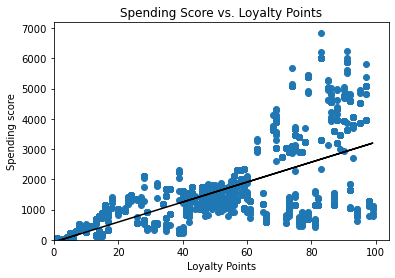

In [13]:
# Plot the graph with a regression line.
# Plot the data points with a scatterplot.
plt.scatter(x_spend, y_spend)

# Plot the regression line (in black).
plt.plot(x_spend, y_pred_spend, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Add title and axis labels.
plt.title("Spending Score vs. Loyalty Points")
plt.xlabel("Loyalty Points")
plt.ylabel("Spending score")


# View the plot.
plt.show()

### Analysis Review

For spending score, the model showed a positive correlation with loyalty points (coef = 33.06, p < 0.0001). This suggests that as customers' spending score increases, their loyalty points accumulation also increases. This relationship is statistically significant and explains 45.2% of the variance in loyalty points (R-squared = 0.452).

### 5b) income vs loyalty

In [14]:
# Independent variable.
x_income = clean_reviews['income']

# Dependent variable.
y_income = clean_reviews['loyalty_points']

# OLS model and summary.
model_income = 'y_income ~ x_income'
test = ols(model_income,data=clean_reviews).fit()

# view the output
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               y_income   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Fri, 28 Jul 2023   Prob (F-statistic):          2.43e-209
Time:                        13:42:38   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x_income      34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# Extract the estimated parametes.
print("Parameters:", test.params)

# Extract the standard errors.
print('Standard errors:', test.bse)

# Extract the predicted values.
print('Predicted values:', test.predict())

Parameters: Intercept   -65.686513
x_income     34.187825
dtype: float64
Standard errors: Intercept    52.170717
x_income      0.977925
dtype: float64
Predicted values: [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [16]:
# Set the the X coefficient and the constant to generate the regression table.
y_pred_income = (-65.686) + 34.187* clean_reviews['income']

# View the output.
y_pred_income

0        354.81410
1        354.81410
2        382.84744
3        382.84744
4        410.88078
           ...    
1995    2821.74802
1996    3102.08142
1997    3102.08142
1998    3298.31480
1999    3102.08142
Name: income, Length: 2000, dtype: float64

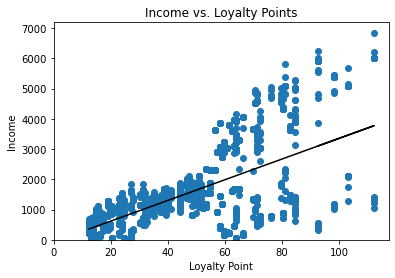

In [17]:
# Plot graph with regression line.
# Plot the data points with a scatterplot.
plt.scatter(x_income, y_income)

# Plot the regression line (in black).
plt.plot(x_income, y_pred_income, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Add title and axis labels.
plt.title("Income vs. Loyalty Points")
plt.xlabel("Loyalty Point")
plt.ylabel("Income")


# View the plot.
plt.show()

### Analysis Review

Similarly, a positive correlation was found between remuneration and loyalty points (coef = 34.19, p < 0.0001). As remuneration increases, so does the accumulation of loyalty points. This relationship is also statistically significant and explains 38% of the variance in loyalty points (R-squared = 0.380).

### 5c) age vs loyalty

In [18]:
# Independent variable.
x_age = clean_reviews['age']

# Dependent variable.
y_age = clean_reviews['loyalty_points']

# OLS model and summary.
model_age = 'y_age ~ x_age'
test = ols(model_age,data=clean_reviews).fit()

# view the output
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_age   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Fri, 28 Jul 2023   Prob (F-statistic):             0.0577
Time:                        13:42:45   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x_age         -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Extract the estimated parametes.
print("Parameters:", test.params)

# Extract the standard errors.
print('Standard errors:', test.bse)

# Extract the predicted values.
print('Predicted values:', test.predict())

Parameters: Intercept    1736.517739
x_age          -4.012805
dtype: float64
Standard errors: Intercept    88.248731
x_age         2.113177
dtype: float64
Predicted values: [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [20]:
# Set the X coefficient and the constant to generate the regression table.
y_pred_age = (1736.51)+(-4.012)* clean_reviews['age']

# View the output.
y_pred_age

0       1664.294
1       1644.234
2       1648.246
3       1636.210
4       1604.114
          ...   
1995    1588.066
1996    1563.994
1997    1600.102
1998    1600.102
1999    1608.126
Name: age, Length: 2000, dtype: float64

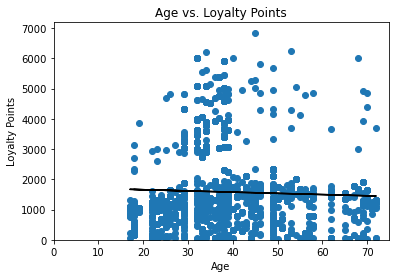

In [21]:
# Plot graph with regression line.
plt.scatter(x_age, y_age)

# Plot the regression line (in black).
plt.plot(x_age, y_pred_age, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Add title and axis labels.
plt.title("Age vs. Loyalty Points")
plt.xlabel("Age")
plt.ylabel("Loyalty Points")


# View the plot.
plt.show()

### Analysis Review

In contrast, the age of customers appears to have a slight negative correlation with loyalty points (coef = -4.01, p = 0.058). As the age of customers increases, the accumulation of loyalty points slightly decreases. However, this relationship is not statistically significant (p > 0.05) and explains a very small portion of the variance in loyalty points (R-squared = 0.002). 

## 6. Observations and insights

From these results, it is clear that spending score and remuneration are significant predictors of loyalty points accumulation, while age is less influential. Further investigation may be required to determine whether other factors, such as specific buying habits or types of purchases, have an impact on the accumulation of loyalty points.

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## 1. Load and explore the data

In [22]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [23]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('reviews_clean1.csv')

# Creating variables for specific columns
df3 = df2[['gender','age','income',
           'score','loyalty_points','education']]

# View the output
df3.head()

,gender,age,income,score,loyalty_points,education
0,Male,18,12.30,39,210,graduate
1,Male,23,12.30,81,524,graduate
2,Female,22,13.12,6,40,graduate
3,Female,25,13.12,77,562,graduate
4,Female,33,13.94,40,366,graduate


In [24]:
df2.head()

,gender,age,income,score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [25]:
# Explore the data.
print(df3.shape)
print(df3.info())
print(df3.head())

(2000, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   income          2000 non-null   float64
 3   score           2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 93.9+ KB
None
   gender  age  income  score  loyalty_points education
0    Male   18   12.30     39             210  graduate
1    Male   23   12.30     81             524  graduate
2  Female   22   13.12      6              40  graduate
3  Female   25   13.12     77             562  graduate
4  Female   33   13.94     40             366  graduate


In [26]:
# Descriptive statistics.
df3.describe() # Using simple describe() function to determine brief analysis



,age,income,score,loyalty_points
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000
std,13.573212,23.123984,26.094702,1283.239705
min,17.000000,12.300000,1.000000,25.000000
25%,29.000000,30.340000,32.000000,772.000000
50%,38.000000,47.150000,50.000000,1276.000000
75%,49.000000,63.960000,73.000000,1751.250000
max,72.000000,112.340000,99.000000,6847.000000


## 2. Plot

try to divide into range of income

<AxesSubplot:xlabel='score', ylabel='income'>

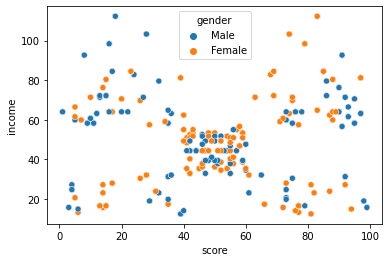

In [27]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='score',
                y='income',
                data=df3,
               hue='gender')

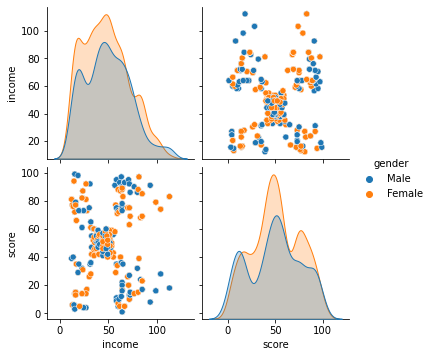

In [28]:
# Create a pairplot with Seaborn.
x = df3[['income','score']]

sns.pairplot(df3,
             vars=x,
             hue='gender',
             diag_kind='kde')

## 3. Elbow and silhoutte methods

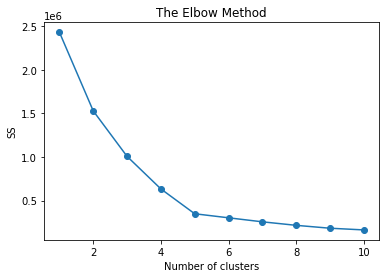

In [29]:
# Determine the number of clusters: Elbow method.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.show()

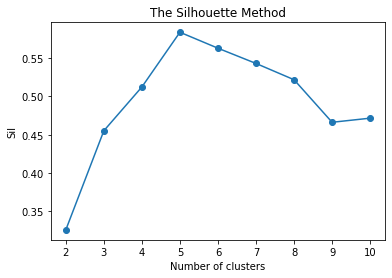

In [30]:
# Determine the number of clusters: Silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

From both elbow and silhouette method shows that the number of cluster will be 5 based on the value of 2 methods.

## 4. Evaluate k-means model at different values of *k*

### 4.a. Using 5 Cluster

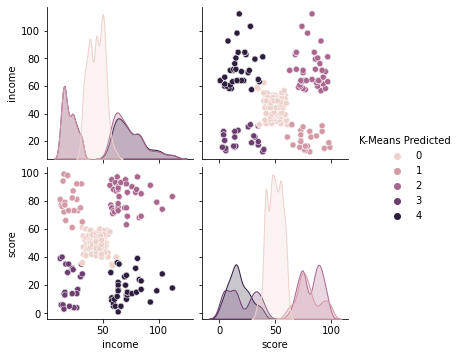

In [31]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [32]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

In [33]:
# Check the number of observations per predicted class.
print(x.head())

   income  score  K-Means Predicted
0   12.30     39                  3
1   12.30     81                  1
2   13.12      6                  3
3   13.12     77                  1
4   13.94     40                  3


## 5. Fit final model and justify your choice

<AxesSubplot:xlabel='income', ylabel='score'>

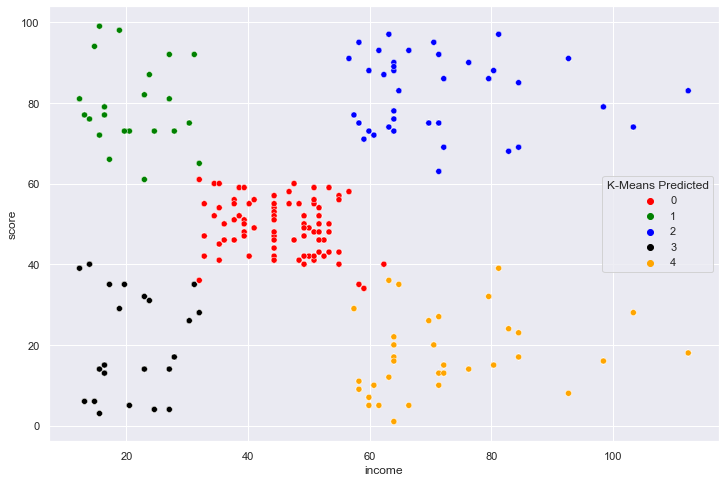

In [34]:
# Apply the final model.
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='income' , 
                y ='score',
                data=x ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

## 6. Plot the data

In [92]:
# k means
# kmeans = KMeans(n_clusters=5, random_state=0)
# df['cluster'] = kmeans.fit_predict(df[['Attack', 'Defense']])

# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

## add to df
x['cen_x'] = x['K-Means Predicted'].map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2], 3:cen_x[3], 4:cen_x[4]})
x['cen_y'] = x['K-Means Predicted'].map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2], 3:cen_y[3], 4:cen_y[4]})

# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF', '#ebd621', '#000000']
x['c'] = x['K-Means Predicted'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3],4:colors[4]})

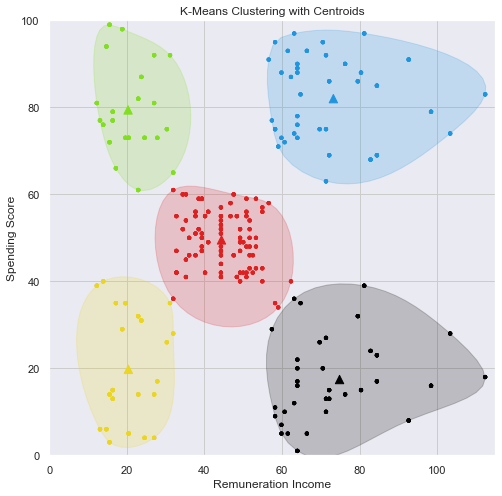

In [110]:
from scipy.spatial import ConvexHull
from scipy import interpolate

fig, ax = plt.subplots(1, figsize=(8, 8))

# plot data
plt.scatter(x['income'], x['score'], c=x.c, alpha=0.6, s=10)

# plot centers
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)

# draw enclosure
for i in x['K-Means Predicted'].unique():
    points = x[x['K-Means Predicted'] == i][['income', 'score']].values
    # get convex hull
    hull = ConvexHull(points)
    # get x and y coordinates
    # repeat last point to close the polygon
    x_hull = np.append(points[hull.vertices, 0],
                       points[hull.vertices, 0][0])
    y_hull = np.append(points[hull.vertices, 1],
                       points[hull.vertices, 1][0])
     # interpolate
    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], 
                                    u=dist_along, s=0, per=1)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = interpolate.splev(interp_d, spline)
    # plot shape
    plt.fill(interp_x, interp_y, '--', c=colors[i], alpha=0.2)
    
plt.xlim(0, 115)
plt.ylim(0, 100)
plt.xlabel('Remuneration Income')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering with Centroids')
plt.grid(color= '#CCCCCC')
plt.show()


## 7. Discuss: Insights and observations

Our analysis employed the k-means clustering algorithm to segment our customer base with respect to their remuneration levels and spending scores. The analysis showed an optimal formation of 5 distinct clusters, each providing an insight into different customer behavioural patterns. Below is a breakdown of these customer segments:

- **High income, High spending**: This cluster represents our premium customer base. With a high income and high spending scores, these customers are not hesitant to spend on quality and luxury. Tailoring high-end products and personalized services could be a potential marketing strategy for this segment.

- **High income, Low spending**: These are customers with high income but relatively lower spending scores. Their frugality suggests a preference for savings or value deals. Marketing strategies for this segment could highlight cost-effectiveness and savings.

- **Low income, High spending**: These customers, despite having lower income, show high spending scores. Their spending pattern indicates a tendency towards immediate needs or desires. Offering options for financing or creating budget-friendly deals could cater to this segment effectively.

- **Low income, Low spending**: This segment, characterized by low income and low spending scores, likely focus on essential purchases. Marketing strategies can emphasize affordability and essential value.

- **Moderate income, Moderate spending**: The customers in this group show balanced income and spending habits. They can be further examined for more specific characteristics, and marketing strategies can be diversified to cater to this segment.

This segmentation allows us to tailor our marketing strategies more effectively, addressing the needs and preferences of each segment. Further study can be conducted to dive deeper into the characteristics of each segment, such as understanding the impact of age, loyalty points, and other factors.

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## 1. Load and explore the data

In [36]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt
import seaborn as sns

#nltk.download ('punkt')
#nltk.download ('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm
from wordcloud import STOPWORDS

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [37]:
# Load the data set as df4.
df4 = pd.read_csv('reviews_clean1.csv')

# View DataFrame.
df4.head()

,gender,age,income,score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [38]:
# Explore data set.
print(df4.info())
print(df4.shape)
#print(df4.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   income          2000 non-null   float64
 3   score           2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None
(2000, 9)


In [39]:
# Keep necessary columns. Drop unnecessary columns.
reviews_smm = df4[['review','summary']]

# View DataFrame.
reviews_smm.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [40]:

# Determine if there are any missing values.
reviews_smm.isna().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [41]:
# Review: Change all to lower case and join with a space.
reviews_smm['review'] = reviews_smm['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# View the data
reviews_smm['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [42]:
# Summary: Change all to lower case and join with a space.
reviews_smm['summary'] = reviews_smm['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# View the data
reviews_smm['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [43]:
# Replace all the punctuations in review column.
reviews_smm['review'] = reviews_smm['review'].str.replace('[^\w\s]','')

# View output.
reviews_smm['review']

0       when it comes to a dms screen the space on the...
1       an open letter to galeforce9 your unpainted mi...
2       nice art nice printing why two panels are fill...
3       amazing buy bought it as a gift for our new dm...
4       as my review of gf9s previous screens these we...
                              ...                        
1995    the perfect word game for mixed ages with mom ...
1996    great game did not think i would like it when ...
1997             great game for all keeps the mind nimble
1998                                             fun game
1999    this game is fun a lot like scrabble without a...
Name: review, Length: 2000, dtype: object

In [44]:
# Replace all the puncuations in summary column.
reviews_smm['summary'] = reviews_smm['summary'].str.replace('[^\w\s]','')

# View output.
reviews_smm['summary']

0       the fact that 50 of this space is wasted on ar...
1       another worthless dungeon masters screen from ...
2                          pretty but also pretty useless
3                                              five stars
4                                              money trap
                              ...                        
1995        the perfect word game for mixed ages with mom
1996                                            super fun
1997                                           great game
1998                                           four stars
1999                                       love this game
Name: summary, Length: 2000, dtype: object

### 2c) Drop duplicates in both columns

In [45]:
# Check for duplicate
reviews_smm.duplicated().sum()

39

In [46]:
# Drop duplicates in both columns.
reviews_sum = reviews_smm.drop_duplicates(subset=['review','summary'])

In [47]:
# sense-check for the duplicated items
print(reviews_sum.duplicated().sum())

0


In [48]:
# View the data
print(reviews_sum.shape)
reviews_sum.head()


(1961, 2)


,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


## 3. Tokenise and create wordclouds

In [49]:
# Create new DataFrame (copy DataFrame).
copy_reviews = reviews_sum.copy()
# View DataFrame.
copy_reviews.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


In [50]:
# Tokenise the words from 'review'.
copy_reviews['tokens'] = copy_reviews['review'].apply(word_tokenize)

# Preview data.
copy_reviews['tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens, dtype: object

In [51]:
# Tokenise the words from 'summary'.
copy_reviews['tokens1'] = copy_reviews['summary'].apply(word_tokenize)

# Preview data.
copy_reviews['tokens1'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: tokens1, dtype: object

In [52]:
#Create a new list to store all the tokens
all_tokens = copy_reviews['tokens'].tolist( ) + copy_reviews['tokens1'].tolist( )

### 3.a. creating wordclouds (review)

In [53]:
all_tokens

[['when',
  'it',
  'comes',
  'to',
  'a',
  'dms',
  'screen',
  'the',
  'space',
  'on',
  'the',
  'screen',
  'itself',
  'is',
  'at',
  'an',
  'absolute',
  'premium',
  'the',
  'fact',
  'that',
  '50',
  'of',
  'this',
  'space',
  'is',
  'wasted',
  'on',
  'art',
  'and',
  'not',
  'terribly',
  'informative',
  'or',
  'needed',
  'art',
  'as',
  'well',
  'makes',
  'it',
  'completely',
  'useless',
  'the',
  'only',
  'reason',
  'that',
  'i',
  'gave',
  'it',
  '2',
  'stars',
  'and',
  'not',
  '1',
  'was',
  'that',
  'technically',
  'speaking',
  'it',
  'can',
  'at',
  'least',
  'still',
  'stand',
  'up',
  'to',
  'block',
  'your',
  'notes',
  'and',
  'dice',
  'rolls',
  'other',
  'than',
  'that',
  'it',
  'drops',
  'the',
  'ball',
  'completely'],
 ['an',
  'open',
  'letter',
  'to',
  'galeforce9',
  'your',
  'unpainted',
  'miniatures',
  'are',
  'very',
  'not',
  'bad',
  'your',
  'spell',
  'cards',
  'are',
  'great',
  'your',
 

In [54]:
# Create a new list to store all the tokens
all_tokens = []

# Flatten the lists of tokens from the 'tokens' and 'tokens1' columns into a single list
all_tokens.extend(token for tokens_list in copy_reviews['tokens'] for token in tokens_list)

In [55]:
# Calculate the frequency distribution.
fdist = FreqDist(all_tokens)

# Preview data.
fdist

FreqDist({'the': 5451, 'and': 3233, 'to': 3162, 'a': 3160, 'of': 2488, 'i': 2090, 'it': 2083, 'is': 1782, 'this': 1776, 'game': 1671, ...})

In [56]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens = [word for word in all_tokens if word.isalnum()]


In [57]:
# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
tokens2 = [x for x in tokens if x.lower() not in english_stopwords]

# Join the filtered list of tokens into a single string.
tokens2_string = ' '.join(tokens2)

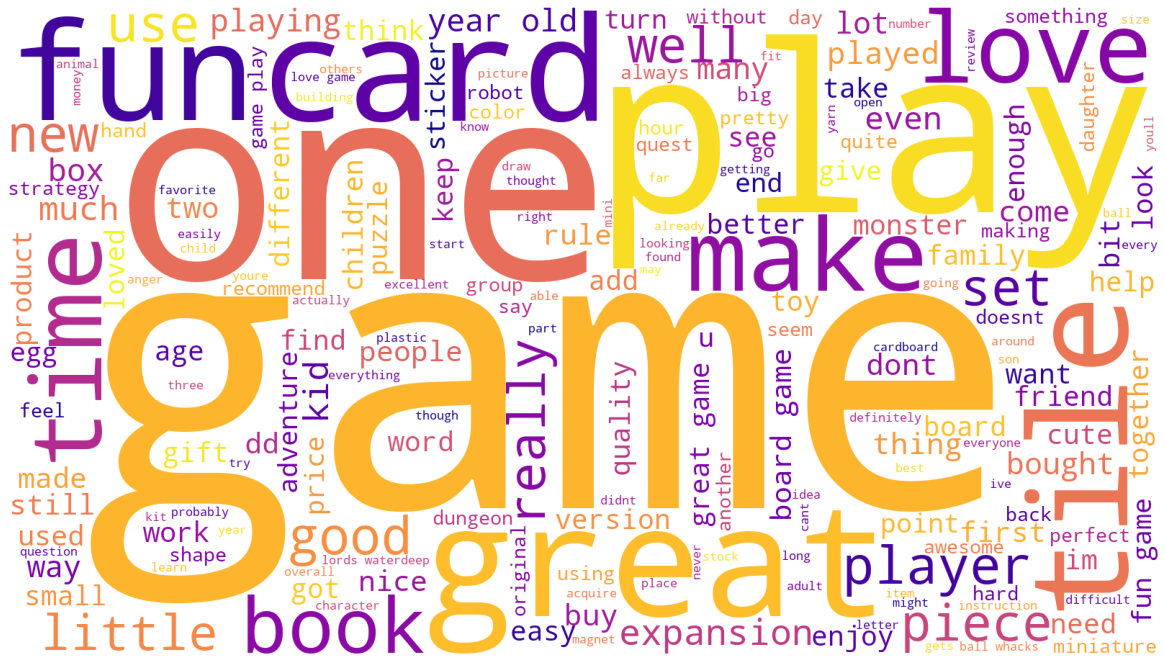

In [58]:
# Create a WordCloud.
wordcloud = WordCloud(width=1600, height=900, 
                      background_color='white', 
                      colormap='plasma',
                      stopwords=None,  # Do not use WordCloud's default stopwords
                      min_font_size=10).generate(tokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize=(16, 9), facecolor=None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad=0) 
plt.show()


### 3.b. creating wordclouds (summary)

In [59]:
# Create a new list to store all the tokens from 'tokens1'/'summary'
all_tokens1 = []

# Flatten the lists of tokens from the 'tokens1' column into a single list
all_tokens1.extend(token for tokens_list in copy_reviews['tokens1'] for token in tokens_list)

In [60]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens1 = [word for word in all_tokens1 if word.isalnum()]


In [61]:
# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
tokens3 = [x for x in tokens1 if x.lower() not in english_stopwords]

# Join the filtered list of tokens into a single string.
tokens3_string = ' '.join(tokens3)

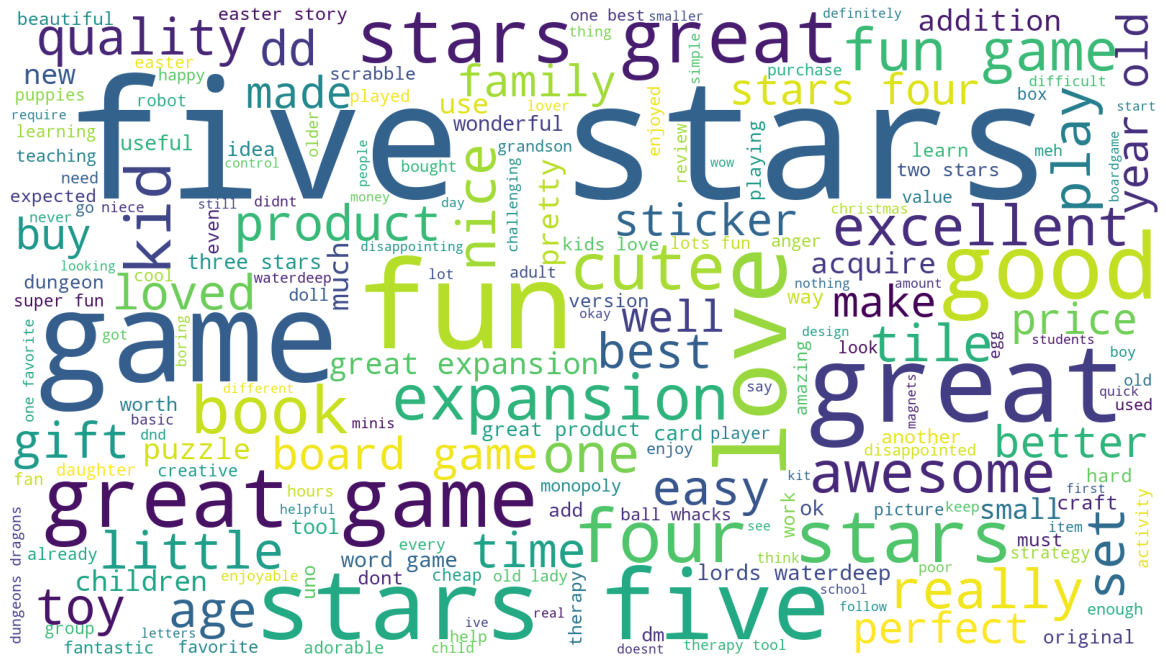

In [62]:
# Create a WordCloud.
wordcloud = WordCloud(width=1600, height=900, 
                      background_color='white', 
                      colormap='viridis',
                      stopwords=None,  # Do not use WordCloud's default stopwords
                      min_font_size=10).generate(tokens3_string) 

# Plot the WordCloud image.                        
plt.figure(figsize=(16, 9), facecolor=None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad=0) 
plt.show()


## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [63]:
# Determine the frequency distribution 'review' column.
# Calculate the frequency distribution.
fdist_tokens = FreqDist(all_tokens)

# Preview data.
fdist

FreqDist({'the': 5451, 'and': 3233, 'to': 3162, 'a': 3160, 'of': 2488, 'i': 2090, 'it': 2083, 'is': 1782, 'this': 1776, 'game': 1671, ...})

In [64]:
# Calculate the frequency distribution for 'tokens1'.
fdist_tokens1 = FreqDist(all_tokens1)

# Preview data for 'tokens1'.
fdist_tokens1

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

### 4d) Identify 15 most common words and polarity

In [65]:
# Import the counter class,
from collections import Counter

# Generate a DataFrame from Counter.
counts_review = pd.DataFrame(Counter(tokens2).most_common(15),
                     columns=['Word','Frequency']).set_index('Word')

# Preview the data
counts_review

,Frequency
Word,
game,1671
great,580
fun,552
one,530
play,502
like,414
love,323
really,319
get,319


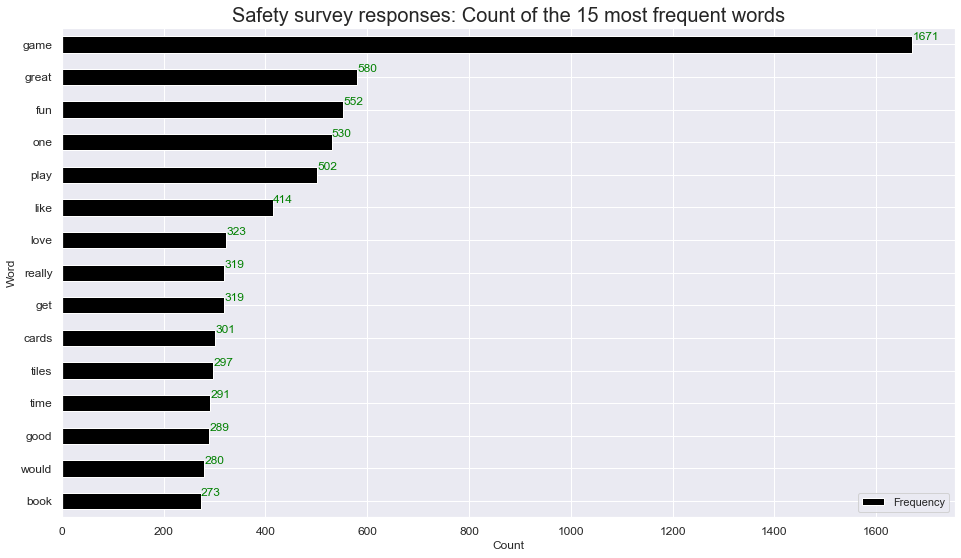

In [66]:
# Set the plot type.
ax = counts_review.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='bone')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Safety survey responses: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='green')

# Reverse the order of the y-axis to have the greatest count on top.
ax.set_ylim(ax.get_ylim()[::-1])

# Show the plot
plt.show()

In [67]:
# Generate a DataFrame from Counter.
counts_summary = pd.DataFrame(Counter(tokens3).most_common(15),
                     columns=['Word','Frequency']).set_index('Word')

counts_summary

,Frequency
Word,
stars,427
five,342
game,319
great,295
fun,218
love,93
good,92
four,58
like,54


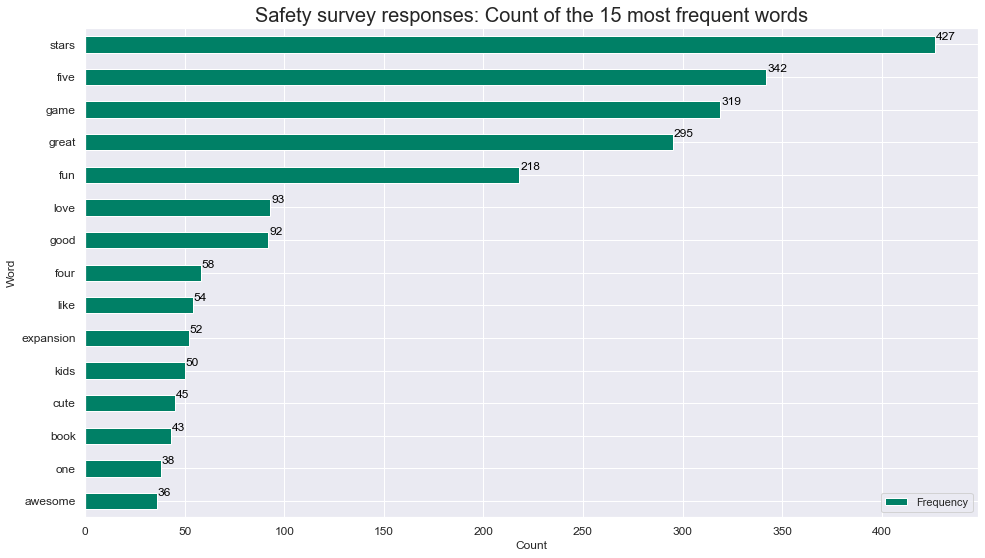

In [68]:
# Set the plot type.
ax = counts_summary.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='summer')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Safety survey responses: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='black')
    

# Reverse the order of the y-axis to have the greatest count on top.
ax.set_ylim(ax.get_ylim()[::-1])

# Show plot
plt.show()

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

### 5a. Review Column

In [69]:
# Define a function to extract a polarity score for the review column.
def generate_polarity(review):
    return TextBlob(review).sentiment[0]

# Populate a new column with polarity scores for each comment.
copy_reviews['polarity'] = copy_reviews['review'].apply(generate_polarity)

# Preview the result.
copy_reviews['polarity'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity, dtype: float64

In [70]:
# Define a function to extract a subjectivity score for the review column.
def generate_subjectivity(review):
    return TextBlob(review).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
copy_reviews['subjectivity'] = copy_reviews['review'].apply(generate_subjectivity)

# Preview the result.
copy_reviews['subjectivity'].head()

0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: subjectivity, dtype: float64

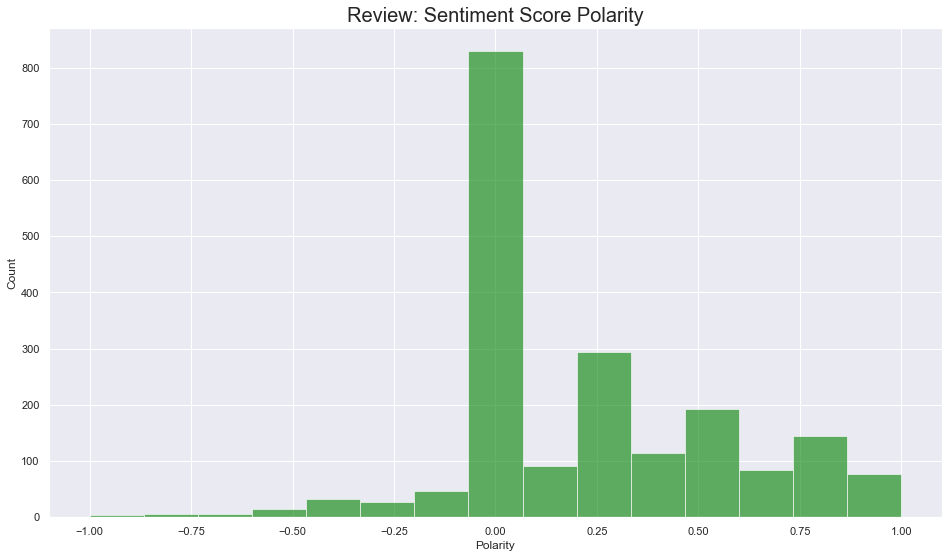

In [77]:
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(copy_reviews['polarity'], num_bins, facecolor='Green', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Review: Sentiment Score Polarity', fontsize=20)

plt.show()

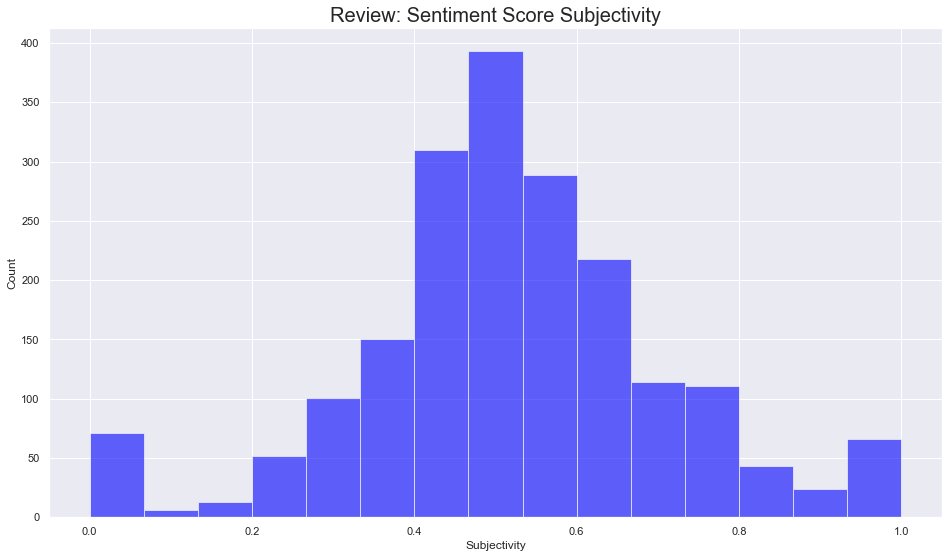

In [78]:
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(copy_reviews['subjectivity'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Review: Sentiment Score Subjectivity', fontsize=20)

plt.show()

### 5b. Summary Column

In [79]:
# Define a function to extract a polarity score for the review column.
def generate_polarity(summary):
    return TextBlob(summary).sentiment[0]

# Populate a new column with polarity scores for each comment.
copy_reviews['polarity'] = copy_reviews['summary'].apply(generate_polarity)

# Preview the result.
copy_reviews['polarity'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity, dtype: float64

In [82]:
# Define a function to extract a subjectivity score for the review column.
def generate_subjectivity(summary):
    return TextBlob(summary).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
copy_reviews['subjectivity'] = copy_reviews['summary'].apply(generate_subjectivity)

# Preview the result.
copy_reviews['subjectivity'].head()

0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: subjectivity, dtype: float64

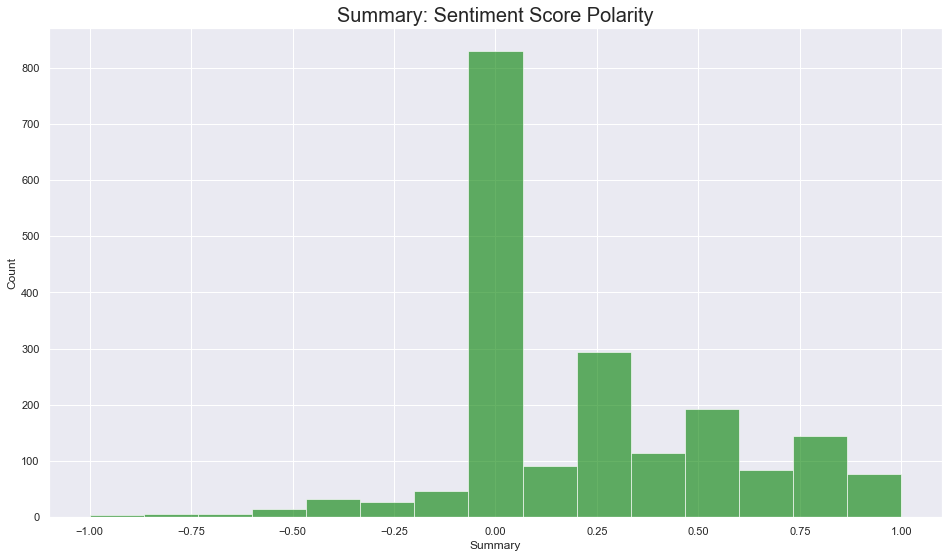

In [84]:
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(copy_reviews['polarity'], num_bins, facecolor='green', alpha=0.6)

# Set the labels.
plt.xlabel('Summary', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Summary: Sentiment Score Polarity', fontsize=20)

plt.show()

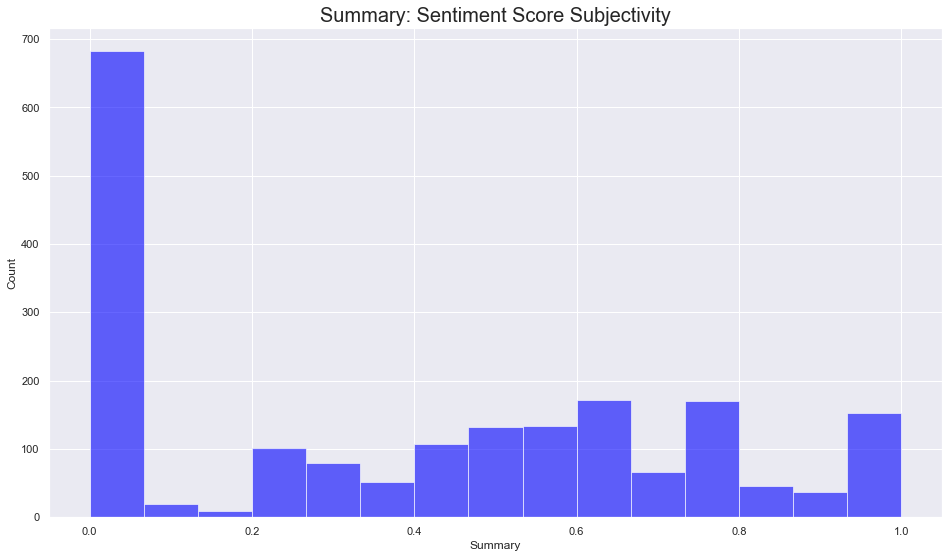

In [83]:
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(copy_reviews['subjectivity'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Summary', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Summary: Sentiment Score Subjectivity', fontsize=20)

plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [60]:
# Top 20 negative reviews.

# Create a DataFrame.
negative_sentiment = copy_reviews.nsmallest(20, 'polarity')

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['review','polarity','subjectivity']]

# adjust the column width
negative_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})



,review,polarity,subjectivity
21,these are cute tatoos for those who love pirates however the retail price is 150 and amazons price is more than double i have never paid over the retail price for an item at amazon i was shocked there are only a handful of tatoos and for 150 i wouldnt mind but to charge 350 for an item that sells anywhere else for 150 is criminal find it at a local drugstore and save your,-1.000000,1.000000
208,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,-1.000000,1.000000
829,ive discovered that im really new school when it comes to my board games except for boggle and a couple chess boards and a novelty version of yahtzee this is the oldest game i own by more than 30 years its very watered down for my usual tastes gameplay consists of playing tiles on a board to start expand or merge hotel chains then you buy stocks trying to predict which ones will grow so you can buy as low as possible and sell them for huge profits by the end of the game the player with the most money at the end wins i think this game is certainly better with more people it can accommodate up to 6 and that may be too many ive never played with that number but with 3 or fewer it is too easy to run away with the game more players offers more competition and gaps between your turns and dilutes the available stock with three you can see what tiles you have available and buy up huge amounts of stock early before other players have time to react and attempt to thwart your plan or prevent you from a big payout ive enjoyed power grid and have intended on playing a deeper economic game for some time but this certainly isnt it this is much more shallow an experience although it does play reasonably quickly and may fill a shorter time slot if players are looking for a quick buy and sell stock game,-1.000000,1.000000
1166,before this i hated running any rpg campaign dealing with towns because it kills the momentum and just becomes 2 hours of haggling for magic items this helps open up story ideas and plot hooks,-0.900000,0.700000
1,an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could have been easily reduced to a single panel in size and the few table you have are nighuseless themselves in short stop making crap dm screens,-0.800000,0.900000
144,my kids grew up with a peg bench and hammer and loved it but i bought this brand for my grandson and was disappointed the pegs fit too loosely into the bench and he does not even use his hammer to pound them in as he can just push them in with his hand or sometimes they fall through automatically my suggestion is to make the pegs fit a little tighter so the kids can learn skills of coordination etc when pounding them in the pegs are nice and thick for little hands but just not snug enough fitting to really use the toy as it is intended,-0.750000,0.750000
631,eggs split and were unusable,-0.750000,0.750000
793,my mom already owned an acquire game but she always commented on how poorly it was made so i thought i would get her a new one for christmas the quality of this one was not much better her old one had cards for each player to see how much each hotel cost to buy according to how many tiles it had this one did not even have that i expected better quality for the price i paid for it it didnt even come with a bag for the tiles i think she was disappointed,-0.750000,0.750000


In [61]:
# Top 20 negative summaries.


# Create a DataFrame.
negative_sentiment1 = copy_reviews.nsmallest(20, 'polarity')

# Eliminate unnecessary columns.
negative_sentiment1 = negative_sentiment1[['summary','polarity','subjectivity']]

# adjust the column width
negative_sentiment1.style.set_properties(subset=['summary'], **{'width': '400px'})


,summary,polarity,subjectivity
21,the worst value ive ever seen,-1.000000,1.000000
208,boring unless you are a craft person which i am,-1.000000,1.000000
829,boring,-1.000000,1.000000
1166,before this i hated running any rpg campaign dealing with towns because it,-0.900000,0.700000
1,another worthless dungeon masters screen from galeforce9,-0.800000,0.900000
144,disappointed,-0.750000,0.750000
631,disappointed,-0.750000,0.750000
793,disappointed,-0.750000,0.750000
1620,disappointed,-0.750000,0.750000
363,promotes anger instead of teaching calming methods,-0.700000,0.200000


In [62]:
# Top 20 positive reviews.
# Create a DataFrame.
positive_sentiment = copy_reviews.nlargest(20, 'polarity')

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['review', 'polarity', 'subjectivity']]

# Adjust the column width.
positive_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})

,review,polarity,subjectivity
6,i have bought many gm screens over the years but this one is the best i have ever seen it has all the relevant information i need and no crap filler on it very happy with this screen,1.000000,0.300000
28,these are intricate designs for older children and adults this book is full of beautiful designs just waiting to be awakened by your choice of colors great for creativity,1.000000,1.000000
32,awesome my 8 year olds favorite xmas gift its 915 am xmas morning and hes already colored three of these,1.000000,1.000000
80,my daughter loves these little books theyre the perfect size to keep in the car or a diaper bag or purse i keep them on hand for times when were stuck waiting in a doctors office or anywhere else,1.000000,1.000000
134,this occupied my almost3 year old for nearly an hour stickers were durable and easy to peel afterwards he kept going back to the box to see if there were more robot stickers to assemble in there ill probably drop another dollar and buy it again for his christmas stocking three cheers for the short memory of a preschooler,1.000000,1.000000
140,i bought 8 of these for my 3 year old daughters robot themed birthday party as favors for the little ones and it was a great hit i didnt realize that the stickers were robot parts that the kids assemble themselves to create their own robots that was a lot of fun and for the price it was well worth it,1.000000,1.000000
161,my 8 year old son loves this drawing book loves it,1.000000,1.000000
163,this was a christmas present for a nephew who loves to draw and he loves superheroes he was very happy with his gift,1.000000,1.000000
187,great product took a little practice and time but after you get the hang of it it turns into a cute cuddly little friend mine didnt turn out exactly like the picture but it adds a taste of your own sense of style they are super cute and comes with everything it says it will,1.000000,1.000000
210,i was skeptical but my 9 year old has had so much fun with this kit and it was her favorite christmas present she pretty much made the puppies herself with minimal help from me though i did hot glue some ears rather than use the included glue only downside is the cuttings can be messy but really wonderful instructions wellmade supplies and can be used for many yearsand maybe even making different animals if you are creative highly recommend for artsy determined 9 year olds i actually want to try to make one myself they are so darn cute,1.000000,1.000000


In [63]:
# Top 20 positive summaries.

# Create a DataFrame.
positive_sentiment1 = copy_reviews.nlargest(20, 'polarity')

# Eliminate unnecessary columns.
positive_sentiment1 = positive_sentiment1[['summary', 'polarity', 'subjectivity']]

# Adjust the column width.
positive_sentiment1.style.set_properties(subset=['summary'], **{'width': '200px'})

,summary,polarity,subjectivity
6,best gm screen ever,1.000000,0.300000
28,wonderful designs,1.000000,1.000000
32,perfect,1.000000,1.000000
80,theyre the perfect size to keep in the car or a diaper,1.000000,1.000000
134,perfect for preschooler,1.000000,1.000000
140,awesome sticker activity for the price,1.000000,1.000000
161,awesome book,1.000000,1.000000
163,he was very happy with his gift,1.000000,1.000000
187,awesome,1.000000,1.000000
210,awesome and welldesigned for 9 year olds,1.000000,1.000000


## 7. Discuss: Insights and observations

utilising NLP techniques to gain insights from the customer reviews on the Turtle Games website. Our analysis focused on understanding the sentiment polarity (positive, neutral, or negative) and subjectivity (personal opinion or factual information) expressed in these reviews.

The first step involved identifying the 15 most commonly used words in the reviews. By analyzing word frequency, we can understand the themes or topics that most often arise in customer feedback.

The polarity analysis clearly indicates both positive and negative feedback regarding the products with a dominance of Neutral value on polarity.

We can observe a sort of split - on one side we have customers who find excellent value and quality in their purchases and on the other side, customers who feel let down because the products didn't meet their expectations. Despite the substantial positive feedback, it's hard to ignore the  negative sentiments, which point out essential areas that need to be improved and the need to manage customer expectations better. Focusing on delivering high-quality products that offer value for money, meeting the outlined product objectives, and presenting the products accurately could be fundamental to boosting customer satisfaction.


# 